<a href="https://colab.research.google.com/github/subrataBAEC/Machine_Learning_Projects/blob/main/sonar_mine_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Rock and Mine Prediction Using Machine Learning Algorithms

- Data Loading and pre processing
- Training model using Logistic Regression and Decision Tree algorithms
- confusion matrix,Classification report,ROC AUC
- Hyperparameter Tuning using GridsearchCV
- Comparison of Accuracy
- Data set source: https://www.kaggle.com/datasets/mayurdalvi/sonar-mine-dataset

##1. Importind dependencies/ modules



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import label encoder
from sklearn import preprocessing

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

# Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV

##2. Data loading and pre-processing

In [2]:
# for google colab
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# load data
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML_practices/Sonar_mine_prediction/sonar_data.csv", header=None)
# initially taking 500 rows
#df=df[:10] 
display(df.head(5))
# df.head()
print("shape: ",df.shape)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


shape:  (208, 61)


**Note:** dataset size is small.

In [4]:
# df.info()

# total missing values
df.isnull().sum().sum()

0

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
# renaming col 60 to output
df = df.rename(columns= {60:'output'})
# df.head()

In [7]:
# check imbalance
df["output"].value_counts()

M    111
R     97
Name: output, dtype: int64

**Note:** dataset is balanced

In [8]:
df["output"].unique()

array(['R', 'M'], dtype=object)

In [9]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['output']= label_encoder.fit_transform(df['output'])
  
df['output'].unique()
df["output"].value_counts()

0    111
1     97
Name: output, dtype: int64

**Note:** Label encoded, R=0 and M=1


In [10]:
# separating output(target) column

x = df.drop(columns="output", axis=1)
y = df["output"]
display(x.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

##3. Train-test split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=42)
print(x.shape, X_train.shape, X_test.shape)

(208, 60) (166, 60) (42, 60)


In [12]:
# print(X_train)
# print(Y_train)

##4. Model Training


 ### 4.1: Logistic Regession and evaluation

In [13]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

LogisticRegression()

In [14]:
#accuracy on training data
X_train_prediction = model_LR.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_LR.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

print('Accuracy on test data : ', test_data_accuracy)

# another method
# print('\ntrain acc:',model_LR.score(X_train,Y_train))
# print('\ntest acc:',model_LR.score(X_test,Y_test))

Accuracy on training data :  0.8373493975903614
Accuracy on test data :  0.8571428571428571


**Note:** No over or under fitting

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


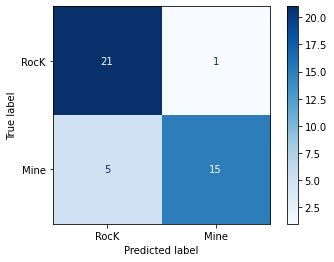

In [15]:
plot_confusion_matrix(model_LR,X_test,Y_test,display_labels=['RocK','Mine'],cmap='Blues') # Rock=0. Mine=1
plt.show()

In [16]:
y_pred = model_LR.predict(X_test) 

confusion_matrix_ = confusion_matrix(Y_test,y_pred)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[21  1]
 [ 5 15]]


In [17]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[0,1]
print("False Negative = ", FN)

FP = confusion_matrix_[1,0]
print("False Positive = ", FP)


TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  21
False Negative =  1
False Positive =  5
True Positives =  15


###4.2 ROC and classification Report: Logistic Regession

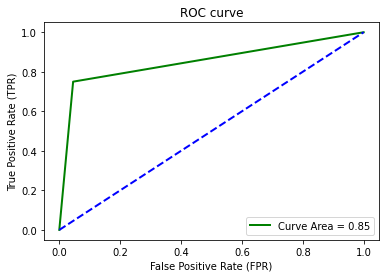

In [18]:
fpr, tpr, thr = roc_curve(Y_test,y_pred)
auc = np.round(roc_auc_score(Y_test,y_pred), 2)

# plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# another method
# plot_roc_curve(model_LR,X_test,Y_test)
# plt.plot([0,1],[0,1])

In [19]:
class_report = classification_report(Y_test,y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.94      0.75      0.83        20

    accuracy                           0.86        42
   macro avg       0.87      0.85      0.85        42
weighted avg       0.87      0.86      0.86        42



###4.3 Hyper paratmeter Tuning: Logistic Regession
- Grid Search and Cross validation

In [20]:
# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

"""
# allowed combinations

‘lbfgs’ - [‘l2’, None]

‘liblinear’ - [‘l1’, ‘l2’]

‘newton-cg’ - [‘l2’, None]
"""

parameters = {'solver': ['newton-cg', 'lbfgs'],  #parameter or grid
              'penalty': ['none', 'l2'],
              'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# 'C': loguniform(1e-5, 100)
# 'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# parameters = {'solver': ['liblinear'],  #parameter or grid
#               'penalty': ['l1', 'l2']}

model_LR_gscv = LogisticRegression(random_state=42)
gscv_LR = GridSearchCV(estimator=model_LR_gscv,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5, # 5 fold corss validation
                           n_jobs=-1)

# fit the model with the best hyper-parameters
gscv_LR = gscv_LR.fit(X_train, Y_train)
# gscv_LR

In [21]:
gscv_LR.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [22]:
# gscv.cv_results_

#Convert to dataframe and sort according to  rank test score
gscv_LR.cv_results_ =pd.DataFrame(gscv_LR.cv_results_)
display(gscv_LR.cv_results_.sort_values('rank_test_score').head()) #df.short_values('column')
display(gscv_LR.cv_results_.shape)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.059685,0.023750,0.003349,0.000632,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.705882,0.787879,0.848485,0.787879,0.878788,0.801783,0.059488,1
26,0.034800,0.016980,0.007681,0.004645,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.705882,0.787879,0.848485,0.787879,0.878788,0.801783,0.059488,1
31,0.048982,0.012590,0.003471,0.000257,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.705882,0.727273,0.818182,0.787879,0.878788,0.783601,0.062430,3
30,0.056613,0.025100,0.006318,0.002713,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.705882,0.727273,0.818182,0.787879,0.878788,0.783601,0.062430,3
22,0.022450,0.007352,0.006929,0.004669,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.764706,0.757576,0.757576,0.757576,0.878788,0.783244,0.047852,5


(32, 16)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


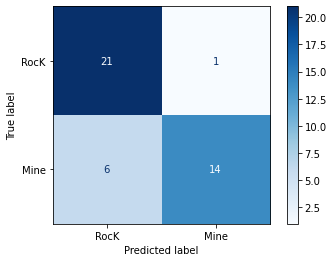

In [23]:
plot_confusion_matrix(gscv_LR,X_test,Y_test,display_labels=['RocK','Mine'],cmap='Blues') # Rock=0. Mine=1
plt.show()

In [24]:
y_pred_gs =gscv_LR.predict(X_test) 

confusion_matrix_gs = confusion_matrix(Y_test,y_pred_gs)

print('confusion_matrix_gs: \n', confusion_matrix_gs)

confusion_matrix_gs: 
 [[21  1]
 [ 6 14]]



###4.4 ROC and classification Report: Logistic Regession -After gscv

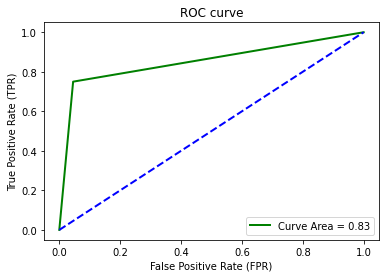

In [25]:
# ROU AUC

fpr, tpr, thr = roc_curve(Y_test,y_pred)
auc = np.round(roc_auc_score(Y_test,y_pred_gs), 2)

# plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# another method
# plot_roc_curve(gscv,X_test,Y_test)
# plt.plot([0,1],[0,1])

In [26]:
print(classification_report(Y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



In [27]:
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('\nAccuracy after tuning: ', accuracy_score(Y_test, y_pred_gs))

Accuracy:  0.8571428571428571

Accuracy after tuning:  0.8333333333333334


**Note:** After gridsearchCV hyper parameter tuning accuracy drops.

In [28]:
print('\ntrain acc:',gscv_LR.score(X_train,Y_train))
print('\ntest acc:',gscv_LR.score(X_test,Y_test))


train acc: 0.8855421686746988

test acc: 0.8333333333333334


 ### 5.1: Decision Tree  and evaluationn


In [29]:
model_DT = DecisionTreeClassifier()
model_DT = model_DT.fit(X_train, Y_train)

In [30]:
#accuracy on training data
X_train_prediction = model_DT.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

print('Accuracy on training data : ', training_data_accuracy)

#accuracy on test data
X_test_prediction = model_DT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

print('Accuracy on test data : ', test_data_accuracy)

# another method
# print('\ntrain acc:',model_LR.score(X_train,Y_train))
# print('\ntest acc:',model_LR.score(X_test,Y_test))

Accuracy on training data :  1.0
Accuracy on test data :  0.7857142857142857


**Note:** Over fitting.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


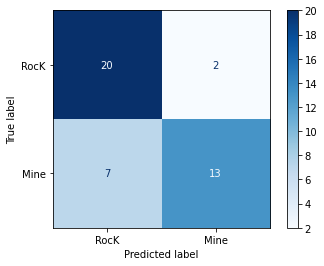

In [31]:
plot_confusion_matrix(model_DT,X_test,Y_test,display_labels=['RocK','Mine'],cmap='Blues') # Rock=0. Mine=1
plt.show()

In [32]:
y_pred = model_DT.predict(X_test) 

confusion_matrix_ = confusion_matrix(Y_test,y_pred)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[20  2]
 [ 7 13]]


In [33]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[0,1]
print("False Negative = ", FN)

FP = confusion_matrix_[1,0]
print("False Positive = ", FP)


TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  20
False Negative =  2
False Positive =  7
True Positives =  13


### ROC and classification Report: Logistic Regession

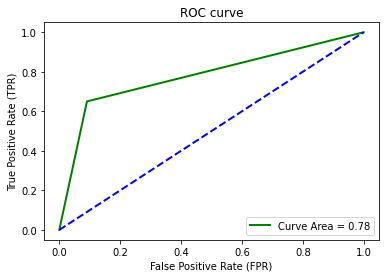

In [34]:
fpr, tpr, thr = roc_curve(Y_test,y_pred)
auc = np.round(roc_auc_score(Y_test,y_pred), 2)

# plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# another method
# plot_roc_curve(model_LR,X_test,Y_test)
# plt.plot([0,1],[0,1])

In [35]:
class_report = classification_report(Y_test,y_pred)
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.87      0.65      0.74        20

    accuracy                           0.79        42
   macro avg       0.80      0.78      0.78        42
weighted avg       0.80      0.79      0.78        42



### Hyper paratmeter Tuning: Logistic Regession
- Grid Search and Cross validation

In [36]:
parameters = {'criterion': ['gini','entropy'],  #parameter or grid
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

model_DT_gscv = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(estimator=model_DT_gscv,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5, # 5 fold corss validation
                           n_jobs=-1)

# fit the model with the best hyper-parameters
gscv_DT = gscv.fit(X_train, Y_train)
gscv_DT

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
             scoring='accuracy')

In [37]:
gscv_DT.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [38]:
# gscv.cv_results_

#Convert to dataframe and sort according to  rank test score
gscv_DT.cv_results_ =pd.DataFrame(gscv_DT.cv_results_)
display(gscv_DT.cv_results_.sort_values('rank_test_score').head()) #df.short_values('column')
display(gscv_DT.cv_results_.shape)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.009315,0.000244,0.004889,0.002738,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.735294,0.757576,0.636364,0.848485,0.727273,0.740998,0.067820,1
11,0.010265,0.001473,0.003145,0.000220,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.764706,0.757576,0.666667,0.787879,0.727273,0.740820,0.041828,2
13,0.017848,0.003031,0.005130,0.002054,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.764706,0.757576,0.636364,0.787879,0.727273,0.734759,0.052871,3
2,0.016367,0.001460,0.005540,0.003412,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.705882,0.757576,0.666667,0.727273,0.787879,0.729055,0.041728,4
19,0.027498,0.008507,0.010581,0.006197,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.705882,0.757576,0.636364,0.787879,0.727273,0.722995,0.051423,5


(20, 15)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


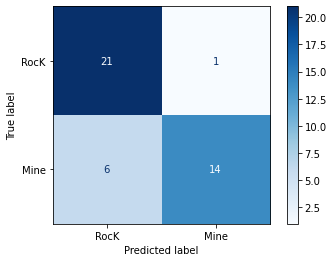

In [39]:
plot_confusion_matrix(gscv_LR,X_test,Y_test,display_labels=['RocK','Mine'],cmap='Blues') # Rock=0. Mine=1
plt.show()

confusion_matrix_gs: 
 [[18  4]
 [ 6 14]]


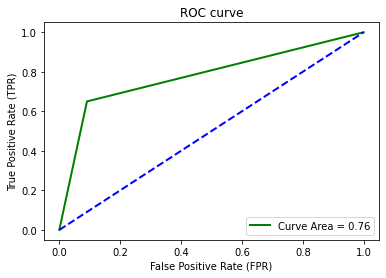

In [40]:
y_pred_gs =gscv_DT.predict(X_test) 

confusion_matrix_gs = confusion_matrix(Y_test,y_pred_gs)

print('confusion_matrix_gs: \n', confusion_matrix_gs)


# ROU AUC

fpr, tpr, thr = roc_curve(Y_test,y_pred)
auc = np.round(roc_auc_score(Y_test,y_pred_gs), 2)

# plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# another method
# plot_roc_curve(gscv,X_test,Y_test)
# plt.plot([0,1],[0,1])

In [41]:
print(classification_report(Y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.78      0.70      0.74        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



In [42]:
print('Accuracy: ', accuracy_score(Y_test, y_pred))
print('\nAccuracy after tuning: ', accuracy_score(Y_test, y_pred_gs))

Accuracy:  0.7857142857142857

Accuracy after tuning:  0.7619047619047619


**Note:** After gridsearchCV hyper parameter tuning accuracy drops.

In [43]:
print('\ntrain acc:',gscv_DT.score(X_train,Y_train))
print('\ntest acc:',gscv_DT.score(X_test,Y_test))


train acc: 0.9939759036144579

test acc: 0.7619047619047619


In [44]:
"""
project idea:
https://www.youtube.com/watch?v=fiz1ORTBGpY&list=PLfFghEzKVmjsNtIRwErklMAN8nJmebB0I&index=29&ab_channel=Siddhardhan
"""

'\nproject idea:\nhttps://www.youtube.com/watch?v=fiz1ORTBGpY&list=PLfFghEzKVmjsNtIRwErklMAN8nJmebB0I&index=29&ab_channel=Siddhardhan\n'